In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

import torch

In [ ]:
# read data
data = pd.read_csv('train_dataset.csv')
# /train_dataset.csv

In [ ]:
data['product_price'].replace({0:-1},inplace = True)

# New section

In [ ]:
def replace_minus_one_with_nan(df):
    num_cols = df._get_numeric_data().columns
    categ_cols = set(df.columns) - set(num_cols)
    for column in num_cols:
        df[column][df[column] == -1] = np.nan
    for column in categ_cols:
        df[column][df[column].isin(["-1"])] = np.nan
    return df

data = replace_minus_one_with_nan(data)

In [ ]:
def time_stamp_to_day_and_hour(df):
    df['click_timestamp'] = df['click_timestamp'].astype(str)
    df['click_timestamp'] = df['click_timestamp'].apply(lambda d: datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))
    df['day'] = df['click_timestamp'].apply(lambda d: d.day)
    df['hour'] = df['click_timestamp'].apply(lambda d: d.hour)
    df = df.drop(columns = ['click_timestamp'])
    return df

data = time_stamp_to_day_and_hour(data)  

In [ ]:
display(data.describe())

,Sale,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,product_price,product_category(7),day,hour
count,100000.000000,13661.000000,1.360600e+04,53940.000000,12784.000000,0.0,100000.000000,100000.000000
mean,0.136610,117.030507,3.213666e+05,439.389006,85.491137,NaN,3.574710,11.877010
std,0.343437,383.010444,5.884293e+05,1541.251393,165.115302,NaN,0.494389,7.091549
min,0.000000,0.000000,8.000000e+00,0.000000,0.180000,NaN,3.000000,0.000000
25%,0.000000,23.023790,6.970000e+02,6.000000,15.830000,NaN,3.000000,5.000000
50%,0.000000,51.870000,4.277500e+03,39.000000,35.565000,NaN,4.000000,13.000000
75%,0.000000,124.990000,3.484675e+05,198.000000,87.420000,NaN,4.000000,18.000000
max,1.000000,23691.224980,2.554631e+06,25390.000000,3928.000000,NaN,4.000000,23.000000


In [ ]:
# For each column specify the state of being numeric or categorical
num_cols = data._get_numeric_data().columns
categ_cols = set(data.columns) - set(num_cols)
print('Numeric columns are:')
for column in num_cols:
    print(column)
print('\nCategorical columns are:')
for column in categ_cols:
    print(column)
    


Numeric columns are:
Sale
SalesAmountInEuro
time_delay_for_conversion
nb_clicks_1week
product_price
product_category(7)
day
hour

Categorical columns are:
device_type
product_category(4)
product_title
product_category(6)
partner_id
user_id
product_category(3)
product_category(2)
product_age_group
product_id
audience_id
product_brand
product_category(5)
product_category(1)
product_gender
product_country


In [ ]:
for column in data.columns:
    print(column)
    print(len(data[column].unique()))
    print('number of missings are:', len(data[data[column].isna()]))

Sale
2
number of missings are: 0
SalesAmountInEuro
8932
number of missings are: 86339
time_delay_for_conversion
9208
number of missings are: 86394
nb_clicks_1week
1138
number of missings are: 46060
product_price
4496
number of missings are: 87216
product_age_group
9
number of missings are: 75603
device_type
4
number of missings are: 39
audience_id
3182
number of missings are: 71793
product_gender
11
number of missings are: 75554
product_brand
4770
number of missings are: 65800
product_category(1)
22
number of missings are: 45502
product_category(2)
145
number of missings are: 45517
product_category(3)
699
number of missings are: 52316
product_category(4)
910
number of missings are: 71222
product_category(5)
442
number of missings are: 92009
product_category(6)
89
number of missings are: 98832
product_category(7)
1
number of missings are: 100000
product_country
17
number of missings are: 23754
product_id
45447
number of missings are: 23714
product_title
27695
number of missings are: 457

In [ ]:
# drop columns because of too many nan values
data = data.drop(columns = ['SalesAmountInEuro','user_id' ,'time_delay_for_conversion' , 'product_category(7)','product_category(5)','product_category(6)'])
# column that should be removen because of so many categories
data = data.drop(columns = ['product_id','product_title' ,'product_brand' , 'audience_id', 'product_price'])
num_cols = data._get_numeric_data().columns
categ_cols = set(data.columns) - set(num_cols)


In [ ]:
# check which columns have correlation in nan values , it means that when first column is nan the second column is nan too
def get_corr_of_nan_values(df2, col1, col2):
    df = df2[df2['Sale'] == 0]
    len1 = len(df[df[col1].isna()])
    len2 = len(df[df[col2].isna()])
    len3 = len(df[(df[col1].isna()) & (df[col2].isna())])
    if len1 > 0 and len2 > 0:
        if len3/len1 > 0.90:
            print(col1 , col2, len3 / len1)

for column in data.columns:
    for column2 in data.columns:
        get_corr_of_nan_values(data, column, column2)

nb_clicks_1week nb_clicks_1week 1.0
nb_clicks_1week product_age_group 0.997789000276375
nb_clicks_1week product_gender 0.997789000276375
nb_clicks_1week product_category(1) 0.987688751538906
nb_clicks_1week product_category(2) 0.9880405014949373
nb_clicks_1week product_category(3) 0.9896736262907967
nb_clicks_1week product_category(4) 0.9923117509610311
product_age_group product_age_group 1.0
product_age_group product_gender 0.9940323428465415
device_type nb_clicks_1week 1.0
device_type product_age_group 1.0
device_type device_type 1.0
device_type product_gender 1.0
device_type product_category(1) 1.0
device_type product_category(2) 1.0
device_type product_category(3) 1.0
device_type product_category(4) 1.0
device_type product_country 1.0
product_gender product_age_group 0.9939094141289225
product_gender product_gender 1.0
product_category(1) nb_clicks_1week 1.0
product_category(1) product_age_group 1.0
product_category(1) product_gender 1.0
product_category(1) product_category(1) 1.0


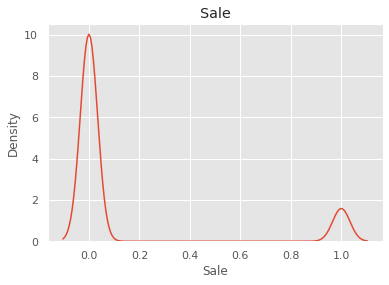

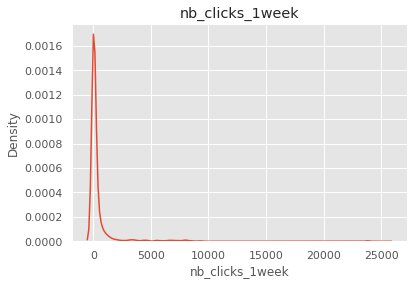

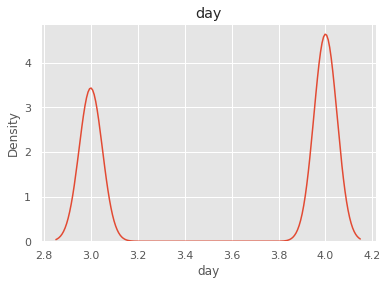

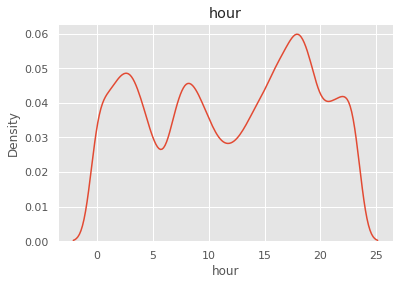

In [ ]:
# distplot numerical columns
for column in num_cols:
    plt.title(column)
    sns.distplot(data[column] , hist = False)
    plt.show()
    


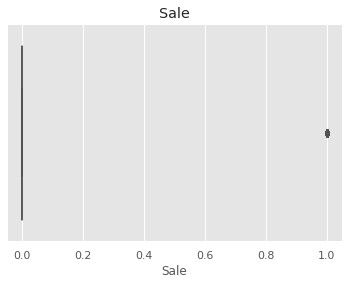

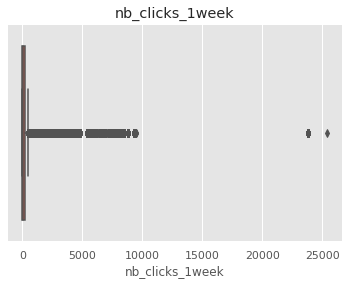

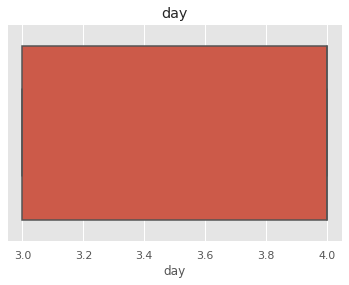

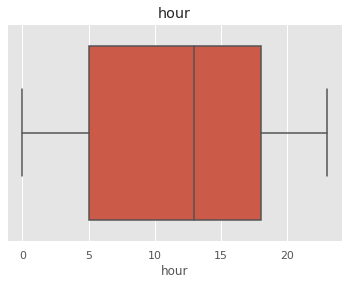

In [ ]:
# define outliers
# distplot numerical columns
for column in num_cols:
    plt.title(column)
    sns.boxplot(x = data[column])
    plt.show()

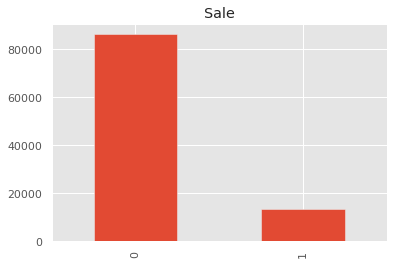

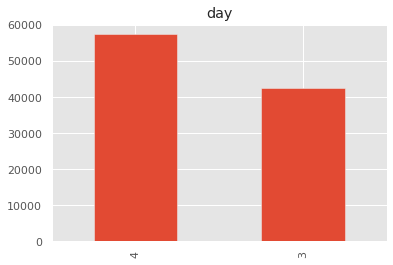

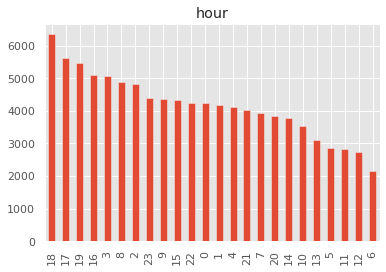

In [ ]:

for column in num_cols:
    if column != 'nb_clicks_1week':
        data[column].value_counts().plot.bar()
        plt.title(column)
        plt.show()


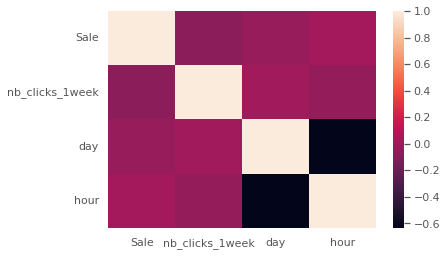

In [ ]:
# heat map correlation matrix
sns.heatmap(data.corr())


In [ ]:
# remove rows with more than 3 null values
drop_index = data[(data.isnull().sum(axis=1) >= 2)&(data['Sale'] == 0)].index
data = data.drop(data.index[drop_index])

In [ ]:
# # using data wig -> train columns one by one
# import datawig
# imputer = datawig.SimpleImputer(
#     input_columns=['partner_id'],
#     output_column='device_type'
#     )
# data2 = data.copy(deep = True)
# imputer.fit(train_df = data2)
# print('fitting finished')
# imputed = imputer.predict(data)
# print(data['device_type'])


In [ ]:
# fill columns with distribution of the column
import random
# column = 'product_price'
# random.choice(data[data[column] != np.nan][column])
for column in data.columns:
    s = data[column].value_counts(normalize=True)
    missing = data[column].isnull()
    data.loc[missing,column] = np.random.choice(s.index, size=len(data[missing]),p=s.values)
    

In [ ]:
cut_value = [150,  10,  80,  100,  100,
              100,  60,  100,  50]

def one_hot_encoding(df):
    num_cols = df._get_numeric_data().columns
    categ_cols = set(df.columns) - set(num_cols)
    for i, column_name in enumerate(categ_cols):
#         column_name = f'product_category({i})'
          tmp1 = df[column_name].value_counts()
          tmp2 = tmp1[tmp1>cut_value[i]].index.tolist()
          df_t = (~df[column_name].isin(tmp2)).astype(int).rename(column_name + 'other').to_frame()
          for j, item1 in enumerate(tmp2):
            #  print(item1)
            #  print(df[column_name].isin([item1]).astype(int))
            df_t = pd.concat([df_t, df[column_name].isin([item1]).astype(int).rename(column_name+f"({j})")], axis=1)
          
          df = df.drop(columns = column_name)
          df = pd.concat([df, df_t], axis=1)
    return df

data2 = one_hot_encoding(data)

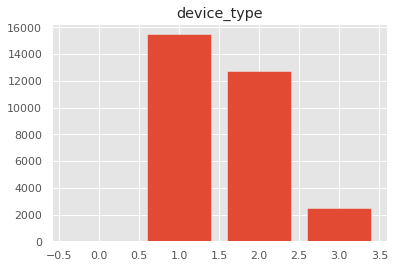

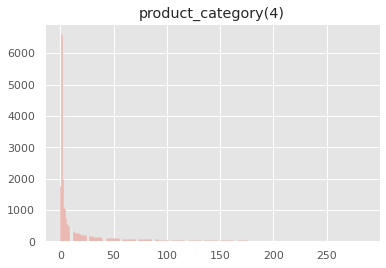

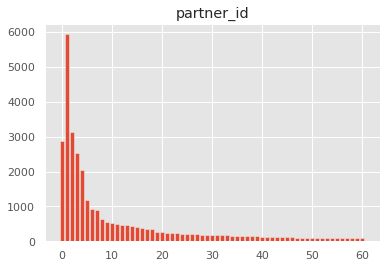

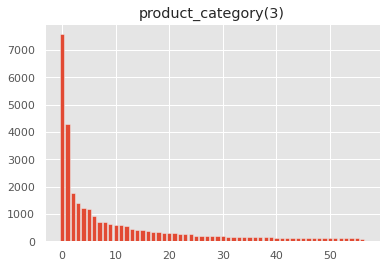

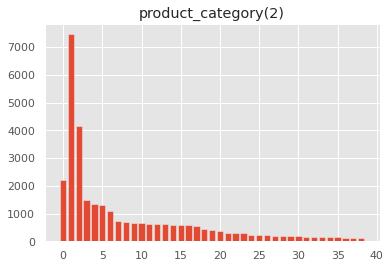

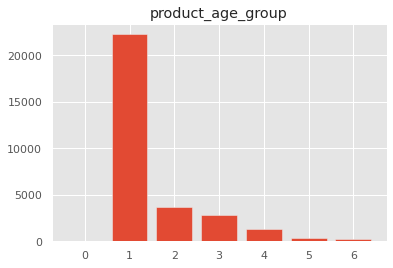

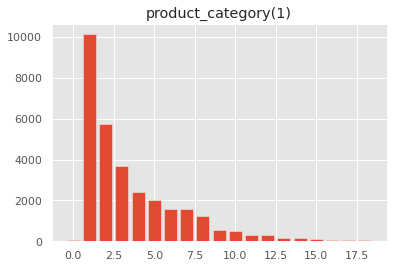

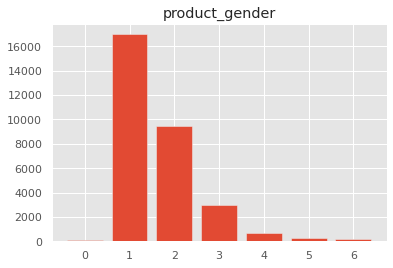

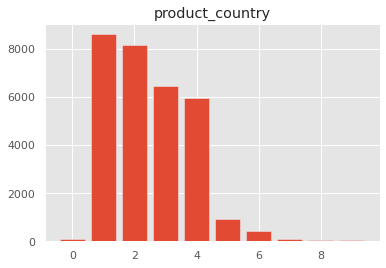

In [ ]:
num_cols = data._get_numeric_data().columns
categ_cols = set(data.columns) - set(num_cols)
for i, column_name in enumerate(categ_cols):
      a = {}
#         column_name = f'product_category({i})'
      tmp1 = data[column_name].value_counts()
      tmp2 = tmp1[tmp1>cut_value[i]].index.tolist()
      ss = (~data[column_name].isin(tmp2)).astype(int).rename(column_name + 'other').sum()
      a[0] = ss.sum()
      for j, item1 in enumerate(tmp2):
            #  print(item1)
            #  print(df[column_name].isin([item1]).astype(int))
            ss = data[column_name].isin([item1]).astype(int).rename(column_name+f"({j})")
#             print(ss.sum())
            a[j+1] = ss.sum()

      plt.bar(a.keys(), a.values())
      plt.title(column_name)
      plt.show()
      

In [ ]:
# we have two dataframes : 1 : data : cleaned data without one hot encoding , 2 : cleaned data with one hot encoding

In [ ]:
#######
# apply t-sne for remaining columns or pca
# 1- PCA :
# Load and show some of data points
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

data_pca = data[num_cols]
data_length = len(data_pca)
column_numbers = len(data_pca.columns)

print(data_pca)
arr = data_pca.to_numpy()
arr = arr.reshape((data_length,column_numbers))

pca = PCA(n_components=3)
principalComponents = pca.fit(arr)
print('eigen values are : \n',principalComponents.explained_variance_)  # eigen values
print('eigen vectors are : \n',principalComponents.components_) 
print('the variance explained from each of the eigen vectors are:\n',principalComponents.explained_variance_ratio_)
print('so the sum of variance explainde is :', sum(principalComponents.explained_variance_ratio_))
print(pd.DataFrame(pca.components_,columns=data_pca.columns,index = ['PC-1','PC-2','PC-3']))




       Sale  nb_clicks_1week  day  hour
4         0           1064.0    3    20
5         0            618.0    4     8
10        0              4.0    4     5
11        0              8.0    4     9
13        1            241.0    3     7
...     ...              ...  ...   ...
99978     1             11.0    4     2
99983     0              2.0    4     8
99988     1             48.0    4     8
99997     1            169.0    4     8
99999     0            182.0    4     8

[30780 rows x 4 columns]
eigen values are : 
 [4.23214099e+06 4.91269157e+01 2.43179716e-01]
eigen vectors are : 
 [[-2.18223736e-05  9.99999998e-01 -7.16290629e-07 -5.37623541e-05]
 [ 6.69863641e-03  5.38231613e-05 -4.41882763e-02  9.99000762e-01]
 [ 9.97274911e-01  2.11771824e-05 -7.31049291e-02 -9.92067710e-03]]
the variance explained from each of the eigen vectors are:
 [9.99988301e-01 1.16079169e-05 5.74595392e-08]
so the sum of variance explainde is : 0.9999999660028525
          Sale  nb_clicks_1week       

In [ ]:
############ Wide and Deep Model ###############

In [ ]:
from sklearn.model_selection import train_test_split
data_new = data.copy(deep = True)
df_train, df_test = train_test_split(data_new, test_size=0.2, stratify=data_new.Sale)

In [ ]:
# !pip install pytorch_widedeep
from pytorch_widedeep import Trainer
from pytorch_widedeep.preprocessing import WidePreprocessor, TabPreprocessor
from pytorch_widedeep.models import Wide, TabMlp, WideDeep
from pytorch_widedeep.metrics import Accuracy

# prepare wide, crossed, embedding and continuous columns
wide_cols = [
       'product_age_group',
       'device_type', 'product_gender', 'product_category(1)',
       'product_category(2)', 'product_category(3)', 'product_category(4)',
       'product_country', 'partner_id'
]
cross_cols = [('product_age_group', 'product_category(1)'), ('product_age_group', 'product_category(2)'), ('product_age_group', 'product_category(3)'), ('product_age_group', 'product_category(4)')]
embed_cols = [
    ("product_age_group", 16),
    ("product_category(1)", 16),
    ("product_category(2)", 16),
    ("product_category(3)", 16),
    ("product_category(4)", 16),
    ("partner_id", 16),
    ("product_gender", 16),
    ("product_country", 16),
    ("device_type", 16),
]
cont_cols = ['nb_clicks_1week', 'day', 'hour']
target_col = "Sale"

# target
target = df_train[target_col].values

In [ ]:
# wide
wide_preprocessor = WidePreprocessor(wide_cols=wide_cols, crossed_cols=cross_cols)
X_wide = wide_preprocessor.fit_transform(data_new)
wide = Wide(wide_dim=np.unique(X_wide).shape[0], pred_dim=1)

# deeptabular
tab_preprocessor = TabPreprocessor(embed_cols=embed_cols, continuous_cols=cont_cols)
X_tab = tab_preprocessor.fit_transform(data_new)
deeptabular = TabMlp(
    mlp_hidden_dims=[32, 32],
    column_idx=tab_preprocessor.column_idx,
    embed_input=tab_preprocessor.embeddings_input,
    continuous_cols=cont_cols,
)

# wide and deep
model2 = WideDeep(wide=wide, deeptabular=deeptabular)

In [ ]:
# train the model
trainer = Trainer(model2, objective="binary", metrics=[Accuracy])
trainer.fit(
    X_wide=X_wide,
    X_tab=X_tab,
    target=target,
    n_epochs=2,
    batch_size=256,
    val_split=0.1,
)

# predict
X_wide_te = wide_preprocessor.transform(df_test)
X_tab_te = tab_preprocessor.transform(df_test)
preds_wide_deep = trainer.predict(X_wide=X_wide_te, X_tab=X_tab_te)

predict: 100%|██████████| 25/25 [00:00<00:00, 47.40it/s]


In [ ]:
print(sklearn.metrics.classification_report(preds_wide_deep, df_test.Sale))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      4427
           1       0.34      0.54      0.42      1729

    accuracy                           0.58      6156
   macro avg       0.56      0.57      0.55      6156
weighted avg       0.65      0.58      0.60      6156



In [ ]:
import mlflow
with mlflow.start_run() as run:
   mlflow.sklearn.save_model(trainer, "my_model_wide")

/usr/local/lib/python3.7/dist-packages/mlflow/types/schema.py:49: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary = (7, np.dtype("bytes"), "BinaryType", np.object)


In [ ]:
 !zip -r my_model_wide.zip my_model_wide/ 


  adding: my_model_wide/ (stored 0%)
  adding: my_model_wide/conda.yaml (deflated 53%)
  adding: my_model_wide/requirements.txt (deflated 49%)
  adding: my_model_wide/model.pkl (deflated 12%)
  adding: my_model_wide/MLmodel (deflated 36%)


In [ ]:
############## Light GBM  #####################
# in this versin of Ligh GBM we are using data because it accepts both numerical and categorical columns

In [ ]:
from sklearn.model_selection import train_test_split
data_new = data.copy(deep = True)
df_train, df_test = train_test_split(data_new, test_size=0.2, stratify=data_new.Sale)

In [ ]:
y_xg = df_train.Sale.copy(deep=True)
x_xg = df_train.drop('Sale', axis=1).copy(deep=True)
y_xgT = df_test.Sale.copy(deep=True)
x_xgT = df_test.drop('Sale', axis=1).copy(deep=True)

In [ ]:
for c in x_xg.columns:
    col_type = x_xg[c].dtype
    if col_type == 'object' or col_type.name == 'category':
       x_xg[c] = x_xg[c].astype('category')
for c in x_xgT.columns:
    col_type = x_xgT[c].dtype
    if col_type == 'object' or col_type.name == 'category':
       x_xgT[c] = x_xgT[c].astype('category')

In [ ]:
import lightgbm as lgb
#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)

In [ ]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(x_xgT,y_xgT)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

In [ ]:
clf.fit(x_xg, y_xg, **fit_params)

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[56]	valid's auc: 0.955163


LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=314, subsample=0.9)

In [ ]:
aa = clf.predict(x_xgT)

In [ ]:
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, y_true):
    return 'f1', f1_score(y_true, y_hat), True

lgb_f1_score(aa, y_xgT)

('f1', 0.9067193675889328, True)

In [ ]:
########## XGBoost ##########

In [ ]:
# in this part we are going to tune the model, we decided to tune two important parameters ehta and max-depth. we set ehtha
# in the range(0.1,0.7) and max-depth in the range of (2,7) and return the best model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

df1 = data2.copy(deep = True)
df4x = df1.drop(columns=['Sale'], errors='ignore')
df4y = df1['Sale']
# 
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(df4x, df4y, random_state=1)

In [ ]:
from xgboost import XGBClassifier
import sklearn
from sklearn.ensemble import RandomForestClassifier

best_sc = -1
best_eta = None
best_max_d = None
for eta in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
  for max_d in range(2, 7):
    xgb = XGBClassifier(eta=0.4, max_depth=5)
    xgb = RandomForestClassifier(n_jobs=-1, verbose=2)
    xgb.fit(dfx_train, dfy_train)
    res3 = xgb.predict(dfx_test)
    # print(sklearn.metrics.classification_report(dfy_test, res3))
    # print(sklearn.metrics.confusion_matrix(dfy_test, res3))
    x = sklearn.metrics.f1_score(dfy_test, res3)
    if best_sc < x:
      best_sc = x
      best_max_d = max_d
      best_eta = eta

In [ ]:
# this is the best model
xgb = XGBClassifier(eta=best_eta, max_depth=best_max_d)
xgb.fit(dfx_train, dfy_train)
res3 = xgb.predict(dfx_test)
print(sklearn.metrics.classification_report(dfy_test, res3))
print(sklearn.metrics.confusion_matrix(dfy_test, res3))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      4248
           1       0.96      0.79      0.87      3447

    accuracy                           0.89      7695
   macro avg       0.91      0.88      0.89      7695
weighted avg       0.90      0.89      0.89      7695

[[4135  113]
 [ 715 2732]]


In [ ]:
import mlflow
with mlflow.start_run() as run:
   mlflow.xgboost.save_model(xgb, "my_xgboost")

In [ ]:
 !zip -r my_xgboost.zip my_xgboost/ 

updating: my_xgboost/ (stored 0%)
updating: my_xgboost/conda.yaml (deflated 31%)
updating: my_xgboost/requirements.txt (deflated 14%)
updating: my_xgboost/MLmodel (deflated 35%)
  adding: my_xgboost/model.xgb (deflated 69%)


In [ ]:
!pip install mlflow

In [ ]:
# In this part we are going to compare XGboost and LightGBM which are discussed previously
# for each model we set the best hyper parameters

In [ ]:
# LightGBM
import lightgbm as lgb 
import xgboost as xgb 
dtrain=xgb.DMatrix(dfx_train,label=dfy_train)
dtest=xgb.DMatrix(dfx_test)
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb
#datetime.timedelta( , , ) representation => (days , seconds , microseconds) 
#now predicting our model on test set 
ypred=xg.predict(dtest) 

#Converting probabilities into 1 or 0  
for i in range(0,len(ypred)): 
    if ypred[i]>=.5:       # setting threshold to .5 
       ypred[i]=1 
    else: 
       ypred[i]=0  
    
#calculating accuracy of our model 
from sklearn.metrics import accuracy_score, f1_score 
accuracy_xgb = accuracy_score(dfy_test,ypred) 
f1_xgb = f1_score(dfy_test,ypred)
print(f1_xgb)

0.872076141313115


In [ ]:
train_data=lgb.Dataset(dfx_train,label=dfy_train)
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']
#Here we have set max_depth in xgb and LightGBM to 7 to have a fair comparison between the two.
#training our model using light gbm
num_round=50
start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
stop=datetime.now()
#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm
#predicting on test set
ypred2=lgbm.predict(dfx_test)
ypred2[0:5]  # showing first 5 predictions
#converting probabilities into 0 or 1
for i in range(0,len(ypred2)):
    if ypred2[i]>=.5:       # setting threshold to .5
       ypred2[i]=1
    else:  
       ypred2[i]=0

In [ ]:
#calculating accuracy
from sklearn.metrics import accuracy_score 
accuracy_lgbm = accuracy_score(ypred2,dfy_test)
f1_lgbm = f1_score(ypred2,dfy_test)
dfy_test.value_counts()
from sklearn.metrics import roc_auc_score
#calculating roc_auc_score for xgboost
auc_xgb =  roc_auc_score(dfy_test,ypred)
print(f1_lgbm)
#calculating roc_auc_score for light gbm. 

0.8715389568576947


In [ ]:
#calculating roc_auc_score for light gbm. 
auc_lgbm = roc_auc_score(dfy_test,ypred2)
comparison_dict = {'f1 score':(f1_lgbm,f1_xgb),'accuracy score':(accuracy_lgbm,accuracy_xgb),'auc score':(auc_lgbm,auc_xgb),'execution time':(execution_time_lgbm,execution_time_xgb)}

In [ ]:
#Creating a dataframe ‘comparison_df’ for comparing the performance of Lightgbm and xgb. 
comparison_df =pd.DataFrame(comparison_dict) 
comparison_df.index= ['LightGBM','xgboost'] 
comparison_df

,f1 score,accuracy score,auc score,execution time
LightGBM,0.871539,0.896296,0.885834,0 days 00:00:00.529603
xgboost,0.872076,0.896946,0.886313,0 days 00:00:24.811309


In [ ]:
# As shown above reach the same f1_score. But the advantage of LightGBM is that it is much faster.

In [ ]:
############# Second deep model : MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

df4x = df1.drop(columns=['Sale'], errors='ignore')
df4y = df1['Sale']
# 
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(df4x, df4y, random_state=1)

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(50,50, 20), max_iter=30,activation = 'relu',solver='adam',random_state=1)
classifier.fit(dfx_train, dfy_train)
y_pred = classifier.predict(dfx_test)
print(sklearn.metrics.classification_report(y_pred, dfy_test))
print(sklearn.metrics.confusion_matrix(y_pred, dfy_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4548
           1       0.85      0.93      0.88      3147

    accuracy                           0.90      7695
   macro avg       0.89      0.90      0.90      7695
weighted avg       0.90      0.90      0.90      7695

[[4014  534]
 [ 234 2913]]


In [ ]:
# Conclusion : here we are going give a brief description of our functionality
# we have 2 deep models and 2 non-deep models
print('XGB classifier')
print(sklearn.metrics.classification_report(dfy_test, res3))


print('MLclassifier:')
print(sklearn.metrics.classification_report(y_pred, dfy_test))

print('LightGBM classifier')
print(sklearn.metrics.classification_report(aa, y_xgT))

print('Wide & Deep')
print(sklearn.metrics.classification_report(preds_wide_deep, df_test.Sale))

XGB classifier
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4248
           1       0.98      0.81      0.89      3447

    accuracy                           0.91      7695
   macro avg       0.92      0.90      0.90      7695
weighted avg       0.92      0.91      0.91      7695

MLclassifier:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4548
           1       0.85      0.93      0.88      3147

    accuracy                           0.90      7695
   macro avg       0.89      0.90      0.90      7695
weighted avg       0.90      0.90      0.90      7695

LightGBM classifier
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      3828
           1       0.84      0.99      0.91      2328

    accuracy                           0.92      6156
   macro avg       0.91      0.94      0.92      6156
weighted avg       0.93  